In [22]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
data_set = fetch_openml('Fashion-MNIST', version=1)

data = data_set["data"]

Data scaling and PCA application

In [24]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

pca = PCA()
pca.fit(scaledData)

PCA()

Calculating cumulative variance, I also print the number of components needed to explain diffenrent values of the variance to better observe their increasing quantity needed.

In [25]:
cumulativeVariance = pca.explained_variance_ratio_.cumsum()

components25Var = next(i for i, total_var in enumerate(cumulativeVariance) if total_var >= 0.25)
print(f'Number of components to explain 25% variance: {components25Var + 1}')

components50Var = next(i for i, total_var in enumerate(cumulativeVariance) if total_var >= 0.50)
print(f'Number of components to explain 50% variance: {components50Var + 1}')

components75Var = next(i for i, total_var in enumerate(cumulativeVariance) if total_var >= 0.75)
print(f'Number of components to explain 75% variance: {components75Var + 1}')

Number of components to explain 25% variance: 2
Number of components to explain 50% variance: 5
Number of components to explain 75% variance: 32


Plot the cumulative variance explained by the first 40 components

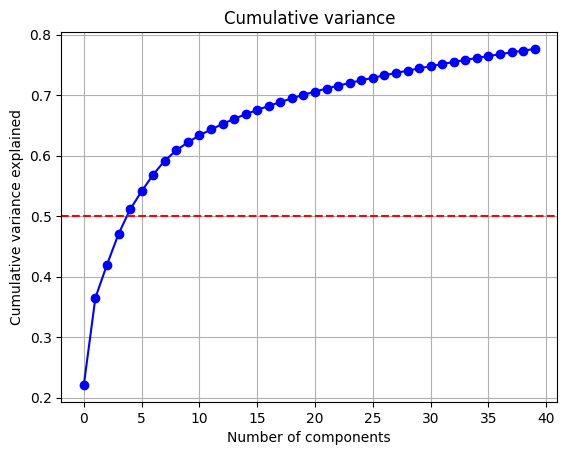

In [26]:
plt.plot(cumulativeVariance[:40], marker='o', linestyle='-', color='b')
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance explained')
plt.axhline(y=0.50, color='r', linestyle='--', label='50% threshold')
plt.grid(True)
plt.show()

To conclude, we need 5 components to explain 50% of the cumulative variance.
